# There is a problem 😧😧😧😧😧😧
# What is it ?????? & What we should dooo??? 





# If we gave some data (features) to the "Wish.com" website,it should predict the rating of the items 
# For example we want to predict the rating of this T-shirt so you should enter its color is red with size XL ... etc and the website will give you the rating


# So, we will solve it here in this notebook
* Our inputs are the features as: color, size ,.... etc
* Our output is the rating on the data
* Data mining function is required classification (as we predict rating according to some features
* We will face some challenges as the null(missing)values, the duplications of the rows, some features that does not affect the rating, the missclassification between data and of course it will need some feature selection as removing the correlation between the features
* The impact of  is that it can help businesses understand their customer
baseline and try to meet customer requirements and satisfication
* I think we may use model that its F1-score will be high on training , validation and testing data without any uderfit or overfit and also apply the best cleansing on the data not just any way


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# We want to read the data (Train data, Test data) 

In [2]:
train_data=pd.read_csv('/content/train_new.csv')
train_data.head()

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,8.00,7,EUR,10000,1,4.0,1670,0,0,0,...,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272
1,8.00,7,EUR,1000,0,4.0,843,1,1,0,...,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515
2,6.00,34,EUR,100,0,4.0,10,0,0,0,...,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940
3,4.67,4,EUR,100,1,3.0,82,0,0,0,...,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08,309
4,8.00,11,EUR,1000,0,4.0,127,0,0,0,...,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08,226


In [3]:
test_data=pd.read_csv('/content/test_new.csv')
test_data.head()

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,5.75,5,EUR,10,1,0,0,0,0,0,...,liyang163,33 % avis positifs (3 notes),3,2.333333,5e63469b2fdc774466e15dd5,0,NaN,summer,2020-08,937
1,7.00,7,EUR,5000,0,579,0,0,0,0,...,singingthesong,"86 % avis positifs (4,213 notes)",4213,4.058391,583547f417dc6224cb464117,0,NaN,summer,2020-08,270
2,5.00,16,EUR,1000,1,62,0,0,0,0,...,surperboutique,"85 % avis positifs (10,501 notes)",10501,4.029235,57086fd7fa6bee434d0e5852,0,NaN,summer,2020-08,308
3,18.00,27,EUR,5000,1,1903,0,0,0,0,...,postonny,"86 % avis positifs (15,855 notes)",15855,4.052917,5a17b55d1f4d8c4f0b44b0ce,0,NaN,summer,2020-08,913
4,12.00,81,EUR,20000,0,1799,0,0,0,0,...,guangzhouchanny,"88 % avis positifs (151,914 notes)",151914,4.127921,53aa664438d3046ee44a5024,0,NaN,summer,2020-08,403


In [4]:
train_data.shape

(1094, 34)

In [5]:
train_data.size # just to know the size of the data

37196

In [6]:
test_data.size # just to know the size of the data

15807

In [7]:
type(train_data) # just to know the type of the data

pandas.core.frame.DataFrame

# To know all the information about the training data
*   the names of the columns  
*   the data type of each column 
*   the type of the training data itself
*   the index of the entries (the total number of the rows)
*   the total number of the columns 



In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1094 non-null   float64
 1   retail_price                  1094 non-null   int64  
 2   currency_buyer                1094 non-null   object 
 3   units_sold                    1094 non-null   int64  
 4   uses_ad_boosts                1094 non-null   int64  
 5   rating                        1094 non-null   float64
 6   rating_count                  1094 non-null   int64  
 7   badges_count                  1094 non-null   int64  
 8   badge_local_product           1094 non-null   int64  
 9   badge_product_quality         1094 non-null   int64  
 10  badge_fast_shipping           1094 non-null   int64  
 11  tags                          1094 non-null   object 
 12  product_color                 1065 non-null   object 
 13  pro

# Here, we want to store only the (int & float) values to (without the the target ) as we will use it later in the normaliztion & standarization  

In [9]:
m=train_data.select_dtypes(include=['int','float']).columns.drop('rating').drop('id')
m

Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating_count',
       'badges_count', 'badge_local_product', 'badge_product_quality',
       'badge_fast_shipping', 'product_variation_inventory',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'merchant_rating_count',
       'merchant_rating', 'merchant_has_profile_picture'],
      dtype='object')

# To know all the information about the test data
*   the names of the columns  
*   the data type of each column 
*   the type of the testing data itself
*   the index of the entries (the total number of the rows)
*   the total number of the columns 



In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         479 non-null    float64
 1   retail_price                  479 non-null    int64  
 2   currency_buyer                479 non-null    object 
 3   units_sold                    479 non-null    int64  
 4   uses_ad_boosts                479 non-null    int64  
 5   rating_count                  479 non-null    int64  
 6   badges_count                  479 non-null    int64  
 7   badge_local_product           479 non-null    int64  
 8   badge_product_quality         479 non-null    int64  
 9   badge_fast_shipping           479 non-null    int64  
 10  tags                          479 non-null    object 
 11  product_color                 467 non-null    object 
 12  product_variation_size_id     477 non-null    object 
 13  produ

# Now,we want to see the duplicated rows in training and testing data to drop or remove it

In [11]:
train_data.duplicated().sum() 

0

In [12]:
test_data.duplicated().sum() 

0

# We will count the null values (as we can not work on them) to be able to remove them (on the training & testing data) 

In [13]:
train_data.isna().sum()

price                             0
retail_price                      0
currency_buyer                    0
units_sold                        0
uses_ad_boosts                    0
rating                            0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    29
product_variation_size_id        12
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner              745
urgency_text                    745
origin_country                   12
merchant_title                    0
merchant_name                     4
merchant_info_subtitle            0
merchant_rating_count             0
merchant_rating             

In [14]:
test_data.isna().sum()

price                             0
retail_price                      0
currency_buyer                    0
units_sold                        0
uses_ad_boosts                    0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    12
product_variation_size_id         2
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner              355
urgency_text                    355
origin_country                    5
merchant_title                    0
merchant_name                     0
merchant_info_subtitle            1
merchant_rating_count             0
merchant_rating                   0
merchant_id                 

# We will drop the all of these columns that will not affect on our model on the train and test data

*   merchant_profile_picture 
*   merchant_id
*   crawl_month
*   merchant_name
*   merchant_info_subtitle
*   merchant_title
*   tags
*   currency_buyer
*   urgency_text
*   theme

In [15]:
train_data = train_data.drop(['merchant_profile_picture','tags', 'currency_buyer', 'urgency_text', 'theme', 'crawl_month', 'merchant_name', 'merchant_info_subtitle', 'merchant_title','merchant_id'],axis=1)


In [16]:
test_data = test_data.drop(['merchant_profile_picture','tags', 'currency_buyer', 'urgency_text', 'theme', 'crawl_month', 'merchant_name', 'merchant_info_subtitle', 'merchant_title','merchant_id'],axis=1)

In [17]:
train_data.product_color.unique().shape # just to see the shape

(88,)

In [18]:
test_data.product_color.unique().shape # just to see the shape

(57,)

# Here, we want to see the classes in the target column to know if there is a class more than the others 
=> as the data must be almost equal in number because we did not want the model to focus on the most frequent class (it must focus on all the data with the same rate) 



<Axes: xlabel='index', ylabel='rating'>

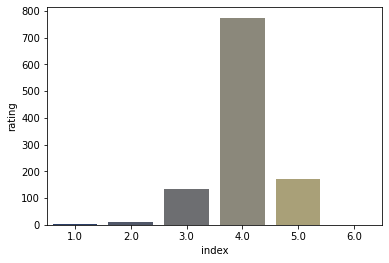

In [19]:
import seaborn as sb
target_col=['rating']
x1=train_data[target_col[0]].value_counts().reset_index()
sb.barplot ( x="index", y="rating",data=x1, palette="cividis")

In [20]:
#just to see the no of the classes in the rating column(target)
train_data.rating.unique()

array([4., 3., 5., 2., 1., 6.])

# Here, we have 2 conclusions:


*   there is a class "6" that is almost has no data on it
*   class "4" id the most frequent class(thats too bad 😠)



# So, we neeed to

1.   remove class6
2.   over sample the model (we need to over sample them as we want to dublicate our data not to remove from it)



# First, we remove class6 and visulize the data

In [21]:
train_data=train_data[train_data.rating!=6]
train_data

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_rating_count,merchant_rating,merchant_has_profile_picture,id
0,8.00,7,10000,1,4.0,1670,0,0,0,0,...,3,0,30,50,NaN,CN,66644,4.137582,1,272
1,8.00,7,1000,0,4.0,843,1,1,0,0,...,3,0,37,50,NaN,CN,25752,4.256873,0,1515
2,6.00,34,100,0,4.0,10,0,0,0,0,...,2,0,41,50,NaN,CN,3897,3.928920,0,940
3,4.67,4,100,1,3.0,82,0,0,0,0,...,1,0,25,50,NaN,CN,7497,4.079365,0,309
4,8.00,11,1000,0,4.0,127,0,0,0,0,...,3,0,15,50,1.0,CN,173,4.306358,0,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,4.00,4,10000,0,4.0,2150,0,0,0,0,...,1,0,41,50,NaN,CN,230951,4.311066,0,1381
1090,5.00,5,1000,0,5.0,377,1,0,1,0,...,2,0,35,50,NaN,CN,2904,4.422521,0,212
1091,9.00,48,1000,1,4.0,135,0,0,0,0,...,3,0,25,50,NaN,CN,6632,3.748794,0,163
1092,11.00,10,10000,1,4.0,1479,0,0,0,0,...,2,0,45,50,1.0,CN,5816,3.936382,0,674


<Axes: xlabel='index', ylabel='rating'>

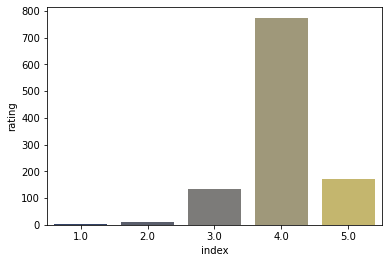

In [22]:
#visualization of the target column
import seaborn as sb
target_col=['rating']
x1=train_data[target_col[0]].value_counts().reset_index()
sb.barplot ( x="index", y="rating",data=x1, palette="cividis")

# We make get rid of the nulls as following steps:


1. we will put all the object columns that want to remove there nulls in variable(and affect our data )   
2. we will exchange each null by the mode of the column
3. the float column(that has nulls) will fills with 0



In [23]:
null_col =  ['product_color', 'product_variation_size_id', 'origin_country']
train_data[null_col]=train_data[null_col].fillna(train_data.mode().iloc[0])

train_data.isna().sum()

price                             0
retail_price                      0
units_sold                        0
uses_ad_boosts                    0
rating                            0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
product_color                     0
product_variation_size_id         0
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner              744
origin_country                    0
merchant_rating_count             0
merchant_rating                   0
merchant_has_profile_picture      0
id                                0
dtype: int64

In [24]:
test_data[null_col]=test_data[null_col].fillna(test_data.mode().iloc[0])
test_data.isna().sum()

price                             0
retail_price                      0
units_sold                        0
uses_ad_boosts                    0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
product_color                     0
product_variation_size_id         0
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner              355
origin_country                    0
merchant_rating_count             0
merchant_rating                   0
merchant_has_profile_picture      0
id                                0
dtype: int64

In [25]:
train_data['has_urgency_banner'] = train_data['has_urgency_banner'].fillna(0) # to fill the nulls with 0

In [26]:
test_data['has_urgency_banner'] = test_data['has_urgency_banner'].fillna(0)

In [27]:
train_data.isna().sum()

price                           0
retail_price                    0
units_sold                      0
uses_ad_boosts                  0
rating                          0
rating_count                    0
badges_count                    0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
product_color                   0
product_variation_size_id       0
product_variation_inventory     0
shipping_option_name            0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
inventory_total                 0
has_urgency_banner              0
origin_country                  0
merchant_rating_count           0
merchant_rating                 0
merchant_has_profile_picture    0
id                              0
dtype: int64

In [28]:
test_data.isna().sum()

price                           0
retail_price                    0
units_sold                      0
uses_ad_boosts                  0
rating_count                    0
badges_count                    0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
product_color                   0
product_variation_size_id       0
product_variation_inventory     0
shipping_option_name            0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
inventory_total                 0
has_urgency_banner              0
origin_country                  0
merchant_rating_count           0
merchant_rating                 0
merchant_has_profile_picture    0
id                              0
dtype: int64

# Now, we want to replace the object with one hot encoder to be able to deal with model
# How we will do it ?????? 😥

*   We will store all the object columns in variable
*   We exchange them using get dummies function (convert the object to one hot encoding)
* We will apply for train and test data 
* We union the train and test data in the same list
* We use the reindex with the unioned data (why ???????)
=> to make the number of columns in train and test the same(without the target only)(Check for missing columns from train and test and fill the extra columns with 0)



In [29]:
train_string = train_data.select_dtypes(include=['object'])
train_string

,product_color,product_variation_size_id,shipping_option_name,origin_country
0,yellow,M,Livraison standard,CN
1,black,L,Livraison standard,CN
2,white,L,Livraison standard,CN
3,lakeblue,XS,Livraison standard,CN
4,apricot,S,Livraison standard,CN
...,...,...,...,...
1089,red,S,Livraison standard,CN
1090,black,H01,Livraison standard,CN
1091,purple,M,Livraison standard,CN
1092,black,M,Livraison standard,CN


In [30]:
test_string = test_data.select_dtypes(include=['object'])
test_string

,product_color,product_variation_size_id,shipping_option_name,origin_country
0,white,XS,Livraison standard,CN
1,black,XS,Livraison standard,CN
2,blue,XS,Livraison standard,CN
3,blue,M,Livraison standard,CN
4,white,M,Livraison standard,CN
...,...,...,...,...
474,black,M,Livraison standard,VE
475,blue,XXS,Livraison standard,CN
476,white,XS,Livraison standard,VE
477,black,34,Livraison standard,CN


In [31]:
# To one hot encode the train data
train_data = pd.get_dummies(train_data, columns = train_string.columns)
train_data

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,shipping_option_name_Standardversand,shipping_option_name_Standart Gönderi,shipping_option_name_Стандартная доставка,shipping_option_name_الشحن القياسي,shipping_option_name_ការដឹកជញ្ជូនតាមស្តង់ដារ,origin_country_CN,origin_country_GB,origin_country_SG,origin_country_US,origin_country_VE
0,8.00,7,10000,1,4.0,1670,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,8.00,7,1000,0,4.0,843,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,6.00,34,100,0,4.0,10,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4.67,4,100,1,3.0,82,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,8.00,11,1000,0,4.0,127,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,4.00,4,10000,0,4.0,2150,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1090,5.00,5,1000,0,5.0,377,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1091,9.00,48,1000,1,4.0,135,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1092,11.00,10,10000,1,4.0,1479,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [32]:
# To one hot encode the test data
test_data = pd.get_dummies(test_data, columns = test_string.columns)
test_data

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,...,shipping_option_name_Livraison standard,shipping_option_name_Spedizione standard,shipping_option_name_Standard Shipping,shipping_option_name_Standardowa wysyłka,shipping_option_name_Стандартная доставка,shipping_option_name_การส่งสินค้ามาตรฐาน,origin_country_AT,origin_country_CN,origin_country_US,origin_country_VE
0,5.75,5,10,1,0,0,0,0,0,5,...,1,0,0,0,0,0,0,1,0,0
1,7.00,7,5000,0,579,0,0,0,0,50,...,1,0,0,0,0,0,0,1,0,0
2,5.00,16,1000,1,62,0,0,0,0,20,...,1,0,0,0,0,0,0,1,0,0
3,18.00,27,5000,1,1903,0,0,0,0,50,...,1,0,0,0,0,0,0,1,0,0
4,12.00,81,20000,0,1799,0,0,0,0,50,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,16.00,14,100,1,27,0,0,0,0,50,...,1,0,0,0,0,0,0,0,0,1
475,6.00,17,5000,1,817,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
476,4.83,51,50,1,1,0,0,0,0,3,...,1,0,0,0,0,0,0,0,0,1
477,3.00,3,100,1,8,0,0,0,0,3,...,1,0,0,0,0,0,0,1,0,0


In [33]:
# Check for missing columns from train and test and fill the extra columns with 0
union_list = list(set().union(train_data.columns, test_data.columns))
union_list.sort()
union_list

['badge_fast_shipping',
 'badge_local_product',
 'badge_product_quality',
 'badges_count',
 'countries_shipped_to',
 'has_urgency_banner',
 'id',
 'inventory_total',
 'merchant_has_profile_picture',
 'merchant_rating',
 'merchant_rating_count',
 'origin_country_AT',
 'origin_country_CN',
 'origin_country_GB',
 'origin_country_SG',
 'origin_country_US',
 'origin_country_VE',
 'price',
 'product_color_Army green',
 'product_color_Black',
 'product_color_Blue',
 'product_color_Pink',
 'product_color_RED',
 'product_color_White',
 'product_color_applegreen',
 'product_color_apricot',
 'product_color_army',
 'product_color_army green',
 'product_color_armygreen',
 'product_color_beige',
 'product_color_black',
 'product_color_black & blue',
 'product_color_black & green',
 'product_color_black & stripe',
 'product_color_black & white',
 'product_color_black & yellow',
 'product_color_blackwhite',
 'product_color_blue',
 'product_color_blue & pink',
 'product_color_brown',
 'product_color_br

In [34]:
train_data = train_data.reindex(columns=union_list, fill_value=0)
train_data

,badge_fast_shipping,badge_local_product,badge_product_quality,badges_count,countries_shipped_to,has_urgency_banner,id,inventory_total,merchant_has_profile_picture,merchant_rating,...,shipping_option_name_Standardowa wysyłka,shipping_option_name_Standardversand,shipping_option_name_Standart Gönderi,shipping_option_name_Стандартная доставка,shipping_option_name_الشحن القياسي,shipping_option_name_การส่งสินค้ามาตรฐาน,shipping_option_name_ការដឹកជញ្ជូនតាមស្តង់ដារ,shipping_option_price,units_sold,uses_ad_boosts
0,0,0,0,0,30,0.0,272,50,1,4.137582,...,0,0,0,0,0,0,0,3,10000,1
1,0,1,0,1,37,0.0,1515,50,0,4.256873,...,0,0,0,0,0,0,0,3,1000,0
2,0,0,0,0,41,0.0,940,50,0,3.928920,...,0,0,0,0,0,0,0,2,100,0
3,0,0,0,0,25,0.0,309,50,0,4.079365,...,0,0,0,0,0,0,0,1,100,1
4,0,0,0,0,15,1.0,226,50,0,4.306358,...,0,0,0,0,0,0,0,3,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,0,0,0,0,41,0.0,1381,50,0,4.311066,...,0,0,0,0,0,0,0,1,10000,0
1090,0,0,1,1,35,0.0,212,50,0,4.422521,...,0,0,0,0,0,0,0,2,1000,0
1091,0,0,0,0,25,0.0,163,50,0,3.748794,...,0,0,0,0,0,0,0,3,1000,1
1092,0,0,0,0,45,1.0,674,50,0,3.936382,...,0,0,0,0,0,0,0,2,10000,1


In [35]:
test_data = test_data.reindex(columns=union_list, fill_value=0).drop(['rating'],axis=1)
test_data

,badge_fast_shipping,badge_local_product,badge_product_quality,badges_count,countries_shipped_to,has_urgency_banner,id,inventory_total,merchant_has_profile_picture,merchant_rating,...,shipping_option_name_Standardowa wysyłka,shipping_option_name_Standardversand,shipping_option_name_Standart Gönderi,shipping_option_name_Стандартная доставка,shipping_option_name_الشحن القياسي,shipping_option_name_การส่งสินค้ามาตรฐาน,shipping_option_name_ការដឹកជញ្ជូនតាមស្តង់ដារ,shipping_option_price,units_sold,uses_ad_boosts
0,0,0,0,0,139,0.0,937,50,0,2.333333,...,0,0,0,0,0,0,0,2,10,1
1,0,0,0,0,31,0.0,270,50,0,4.058391,...,0,0,0,0,0,0,0,2,5000,0
2,0,0,0,0,41,0.0,308,50,0,4.029235,...,0,0,0,0,0,0,0,2,1000,1
3,0,0,0,0,42,0.0,913,50,0,4.052917,...,0,0,0,0,0,0,0,5,5000,1
4,0,0,0,0,38,0.0,403,50,0,4.127921,...,0,0,0,0,0,0,0,3,20000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,0,0,0,0,35,0.0,1166,50,0,3.367133,...,0,0,0,0,0,0,0,4,100,1
475,0,0,0,0,41,0.0,1416,50,1,4.079644,...,0,0,0,0,0,0,0,2,5000,1
476,0,0,0,0,39,1.0,63,50,0,3.824561,...,0,0,0,0,0,0,0,1,50,1
477,0,0,0,0,26,1.0,626,50,0,4.056169,...,0,0,0,0,0,0,0,1,100,1


# We will apply the SMOTE function to be able to imbalance the data 
=> not to male the model focus on the most frequent class
  

In [36]:
# to count the data in each class
import collections
from collections import Counter
dict(Counter(train_data.rating))

{4.0: 774, 3.0: 135, 5.0: 170, 2.0: 12, 1.0: 2}

In [37]:
import imblearn
# from collections import Counter
# from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
col_name=list(train_data.columns)
col_name.remove('rating')
x_train=train_data[col_name]
y_train=train_data['rating']
# transform the dataset
oversample = SMOTE(k_neighbors=1)
x_train, y_train = oversample.fit_resample(x_train, y_train)
train_data=pd.concat([pd.DataFrame(x_train),pd.DataFrame(y_train)],axis=1)
train_data.columns=col_name+ target_col
print(train_data.shape)

(3870, 247)


In [38]:
x_train=train_data[col_name]
y_train=train_data['rating']
y_train.shape

(3870,)

# Voilaaaaaa 🙂🙂🙂🙂🙂🙂

<Axes: xlabel='index', ylabel='rating'>

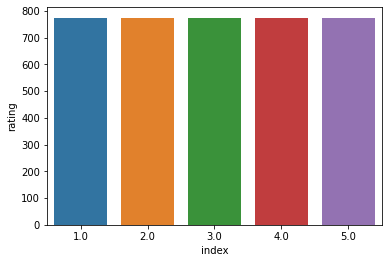

In [39]:
import seaborn as sns
target=['rating']
graph=train_data[target[0]].value_counts().reset_index()
sns.barplot(x='index',y='rating',data=graph)

# We will remove all the correlated features (corr between features and each other) on the main data (Train data) and feed to the normalized and standarized data

In [40]:
x_train_fs=x_train
cor_matrix = x_train_fs.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

['product_variation_size_id_20pcs', 'product_variation_size_id_5', 'product_variation_size_id_SIZE-XXS', 'product_variation_size_id_SizeL', 'product_variation_size_id_choose a size', 'shipping_option_name_Livraison Express']


<ipython-input-40-10690a5f51aa>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [41]:
x_train_fs = x_train_fs.drop(to_drop, axis=1)
x_train.head()

,badge_fast_shipping,badge_local_product,badge_product_quality,badges_count,countries_shipped_to,has_urgency_banner,id,inventory_total,merchant_has_profile_picture,merchant_rating,...,shipping_option_name_Standardowa wysyłka,shipping_option_name_Standardversand,shipping_option_name_Standart Gönderi,shipping_option_name_Стандартная доставка,shipping_option_name_الشحن القياسي,shipping_option_name_การส่งสินค้ามาตรฐาน,shipping_option_name_ការដឹកជញ្ជូនតាមស្តង់ដារ,shipping_option_price,units_sold,uses_ad_boosts
0,0,0,0,0,30,0.0,272,50,1,4.137582,...,0,0,0,0,0,0,0,3,10000,1
1,0,1,0,1,37,0.0,1515,50,0,4.256873,...,0,0,0,0,0,0,0,3,1000,0
2,0,0,0,0,41,0.0,940,50,0,3.928920,...,0,0,0,0,0,0,0,2,100,0
3,0,0,0,0,25,0.0,309,50,0,4.079365,...,0,0,0,0,0,0,0,1,100,1
4,0,0,0,0,15,1.0,226,50,0,4.306358,...,0,0,0,0,0,0,0,3,1000,0


# Now, we will go to main part 😧

# First, we will make the standard scaler on the data 
* Now , the "m" varaible will make his work
* We will apply the standard scaler on the numeric data
* We will concatenate the standard scaler with the original data and drop the old numeric data 

In [42]:
x_train_st = x_train.copy()

In [43]:
from sklearn.preprocessing import StandardScaler

# standardization 
standard = StandardScaler().fit_transform(x_train_st[m]) 
stand=pd.DataFrame(standard, columns=m)
stand.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
count,3.870000e+03,3870.000000,3.870000e+03,3.870000e+03,3.870000e+03,3.870000e+03,3.870000e+03,3.870000e+03,3.870000e+03,3.870000e+03,3.870000e+03,3.870000e+03,3.870000e+03,3.870000e+03,3.870000e+03,3.870000e+03,3.870000e+03,3.870000e+03
mean,-2.203233e-16,0.000000,-7.344111e-18,2.937644e-17,2.937644e-17,-2.203233e-17,1.468822e-17,7.344111e-18,-1.101617e-17,5.875289e-17,-1.101617e-16,7.344111e-18,4.039261e-17,3.616975e-16,8.078522e-17,-9.180139e-18,-3.818938e-16,7.344111e-18
std,1.000129e+00,1.000129,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00
min,-1.715063e+00,-0.739010,-3.181817e-01,-8.740146e-01,-3.016652e-01,-2.367697e-01,-7.386449e-02,-2.182770e-01,-5.577114e-02,-1.527354e+00,-9.017234e-01,-2.273902e-02,-2.116138e+00,-2.613354e+01,-8.675467e-01,-2.414219e-01,-3.631782e+00,-2.536857e-01
25%,-8.611776e-01,-0.662281,-3.101166e-01,-8.740146e-01,-3.008484e-01,-2.367697e-01,-7.386449e-02,-2.182770e-01,-5.577114e-02,-7.727166e-01,-9.017234e-01,-2.273902e-02,-3.863777e-01,6.202503e-02,-8.675467e-01,-2.377886e-01,-7.015559e-01,-2.536857e-01
50%,-2.919206e-01,-0.432093,-3.018869e-01,-8.740146e-01,-2.943142e-01,-2.367697e-01,-7.386449e-02,-2.182770e-01,-5.577114e-02,-2.875924e-01,1.693845e-01,-2.273902e-02,-1.986518e-03,6.202503e-02,-5.811663e-01,-2.021895e-01,2.148544e-01,-2.536857e-01
75%,5.485553e-01,0.220106,-1.537526e-01,1.144146e+00,-1.864997e-01,-2.367697e-01,-7.386449e-02,-2.182770e-01,-5.577114e-02,1.113877e+00,1.693845e-01,-2.273902e-02,1.902091e-01,6.202503e-02,9.208974e-01,-2.819042e-02,6.546100e-01,-2.536857e-01
max,5.685279e+00,8.852147,1.614102e+01,1.144146e+00,1.664155e+01,1.161192e+01,1.353831e+01,4.581336e+00,1.793042e+01,1.113877e+00,5.524924e+00,4.397727e+01,6.340468e+00,6.202503e-02,1.683825e+00,3.136487e+01,2.558725e+00,3.941886e+00


In [44]:
x_train_st=x_train_st.drop(m, axis=1)
x_train_st=pd.concat([x_train_st,stand],axis=1)
x_train_st

,id,origin_country_AT,origin_country_CN,origin_country_GB,origin_country_SG,origin_country_US,origin_country_VE,product_color_Army green,product_color_Black,product_color_Blue,...,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
0,272,0,1,0,0,0,0,0,0,0,...,-0.055771,1.113877,1.240492,-0.022739,-0.706704,0.062025,-0.867547,0.727072,0.894381,3.941886
1,1515,0,1,0,0,0,0,0,0,0,...,-0.055771,1.113877,1.240492,-0.022739,-0.258247,0.062025,-0.867547,0.132780,1.345677,-0.253686
2,940,0,1,0,0,0,0,0,0,0,...,-0.055771,1.113877,0.169385,-0.022739,-0.001987,0.062025,-0.867547,-0.184844,0.104984,-0.253686
3,309,0,1,0,0,0,0,0,0,0,...,-0.055771,-1.311744,-0.901723,-0.022739,-1.027030,0.062025,-0.867547,-0.132524,0.674140,-0.253686
4,226,0,1,0,0,0,0,0,0,0,...,-0.055771,1.113877,1.240492,-0.022739,-1.667682,0.062025,1.683825,-0.238966,1.532886,-0.253686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3865,1093,0,1,0,0,0,0,0,0,0,...,-0.055771,-1.473452,-0.901723,-0.022739,-0.130117,0.062025,-0.867547,-0.237193,1.078899,-0.253686
3866,335,0,1,0,0,0,0,0,0,0,...,-0.055771,1.113877,1.240492,-0.022739,-0.066052,0.062025,-0.809405,-0.136884,1.739541,-0.253686
3867,570,0,1,0,0,0,0,0,0,0,...,-0.055771,0.035824,0.169385,-0.022739,-0.258247,-10.630040,0.647172,-0.157245,1.828311,-0.253686
3868,1336,0,1,0,0,0,0,0,0,0,...,-0.055771,-1.527354,0.169385,-0.022739,-0.898899,0.062025,-0.867547,-0.240376,0.951287,-0.253686


# We will remove all the correlated features (corr between features and each other) of the standarized data

In [45]:
x_stand=x_train_st
cor_matrix = x_stand.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

['product_variation_size_id_20pcs', 'product_variation_size_id_5', 'product_variation_size_id_SIZE-XXS', 'product_variation_size_id_SizeL', 'product_variation_size_id_choose a size', 'shipping_is_express']


<ipython-input-45-d6279bd7dcb2>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [46]:
x_train_stand_fs = x_stand.drop(to_drop, axis=1)
x_train_stand_fs.head()

,id,origin_country_AT,origin_country_CN,origin_country_GB,origin_country_SG,origin_country_US,origin_country_VE,product_color_Army green,product_color_Black,product_color_Blue,...,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
0,272,0,1,0,0,0,0,0,0,0,...,-0.218277,-0.055771,1.113877,1.240492,-0.706704,0.062025,-0.867547,0.727072,0.894381,3.941886
1,1515,0,1,0,0,0,0,0,0,0,...,-0.218277,-0.055771,1.113877,1.240492,-0.258247,0.062025,-0.867547,0.132780,1.345677,-0.253686
2,940,0,1,0,0,0,0,0,0,0,...,-0.218277,-0.055771,1.113877,0.169385,-0.001987,0.062025,-0.867547,-0.184844,0.104984,-0.253686
3,309,0,1,0,0,0,0,0,0,0,...,-0.218277,-0.055771,-1.311744,-0.901723,-1.027030,0.062025,-0.867547,-0.132524,0.674140,-0.253686
4,226,0,1,0,0,0,0,0,0,0,...,-0.218277,-0.055771,1.113877,1.240492,-1.667682,0.062025,1.683825,-0.238966,1.532886,-0.253686


In [47]:
x_test_st = test_data.copy()

In [48]:
from sklearn.preprocessing import StandardScaler

# standardization 
standard = StandardScaler().fit_transform(x_test_st[m]) 
stand1=pd.DataFrame(standard, columns=m)
stand1.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
count,4.790000e+02,4.790000e+02,4.790000e+02,4.790000e+02,4.790000e+02,4.790000e+02,4.790000e+02,4.790000e+02,4.790000e+02,4.790000e+02,4.790000e+02,4.790000e+02,4.790000e+02,4.790000e+02,4.790000e+02,4.790000e+02,4.790000e+02,4.790000e+02
mean,3.708469e-18,7.416939e-18,-2.966776e-17,-1.038371e-16,-2.410505e-17,3.337622e-17,-6.304398e-17,-2.966776e-17,4.079316e-17,4.450163e-17,1.316507e-16,-1.112541e-17,-3.337622e-17,6.304398e-16,1.038371e-16,-4.635587e-18,1.030954e-15,-1.483388e-17
std,1.001045e+00,1.001045e+00,1.001045e+00,1.001045e+00,1.001045e+00,1.001045e+00,1.001045e+00,1.001045e+00,1.001045e+00,1.001045e+00,1.001045e+00,1.001045e+00,1.001045e+00,1.001045e+00,1.001045e+00,1.001045e+00,1.001045e+00,1.001045e+00
min,-1.979937e+00,-7.971981e-01,-4.804190e-01,-8.760866e-01,-4.479001e-01,-2.662899e-01,-1.303270e-01,-2.395728e-01,-1.217806e-01,-1.549666e+00,-1.379383e+00,-4.573894e-02,-1.674530e+00,-1.743043e+01,-5.910125e-01,-4.518540e-01,-7.892740e+00,-3.638512e-01
25%,-6.871211e-01,-5.728617e-01,-4.685483e-01,-8.760866e-01,-4.349579e-01,-2.662899e-01,-1.303270e-01,-2.395728e-01,-1.217806e-01,-1.265391e+00,-3.550041e-01,-4.573894e-02,-4.573092e-01,8.838650e-02,-5.910125e-01,-4.152863e-01,-5.074354e-01,-3.638512e-01
50%,-9.064436e-02,-4.606935e-01,-3.584077e-01,-8.760866e-01,-3.626974e-01,-2.662899e-01,-1.303270e-01,-2.395728e-01,-1.217806e-01,7.719151e-01,-3.550041e-01,-4.573894e-02,-1.910961e-02,8.838650e-02,-5.910125e-01,-3.230886e-01,4.387289e-02,-3.638512e-01
75%,7.190525e-01,1.375368e-01,1.311062e-01,1.141440e+00,1.370435e-02,-2.662899e-01,-1.303270e-01,-2.395728e-01,-1.217806e-01,7.719151e-01,6.693752e-01,-4.573894e-02,1.269569e-01,8.838650e-02,1.692012e+00,2.338694e-02,6.166022e-01,-3.638512e-01
max,3.148143e+00,5.446831e+00,1.175706e+01,1.141440e+00,9.247950e+00,9.066847e+00,7.673005e+00,4.174096e+00,8.211490e+00,7.719151e-01,4.766892e+00,2.186321e+01,4.849775e+00,8.838650e-02,1.692012e+00,1.423614e+01,4.559612e+00,2.748376e+00


In [49]:
x_test_st=x_test_st.drop(m, axis=1)
x_test_st=pd.concat([x_test_st,stand1],axis=1)
x_test_st

,id,origin_country_AT,origin_country_CN,origin_country_GB,origin_country_SG,origin_country_US,origin_country_VE,product_color_Army green,product_color_Black,product_color_Blue,...,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
0,937,0,1,0,0,0,0,0,0,0,...,-0.121781,-1.360149,-0.355004,-0.045739,4.801086,0.088387,-0.591012,-0.451802,-7.892740,-0.363851
1,270,0,1,0,0,0,0,0,0,0,...,-0.121781,0.771915,-0.355004,-0.045739,-0.457309,0.088387,-0.591012,-0.378176,0.162643,-0.363851
2,308,0,1,0,0,0,0,0,0,0,...,-0.121781,-0.649461,-0.355004,-0.045739,0.029579,0.088387,-0.591012,-0.268211,0.026498,-0.363851
3,913,0,1,0,0,0,0,0,0,0,...,-0.121781,0.771915,2.718134,-0.045739,0.078268,0.088387,-0.591012,-0.174579,0.137083,-0.363851
4,403,0,1,0,0,0,0,0,0,0,...,-0.121781,0.771915,0.669375,-0.045739,-0.116487,0.088387,-0.591012,2.204844,0.487324,-0.363851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,1166,0,0,0,0,0,1,0,0,0,...,-0.121781,0.771915,1.693754,-0.045739,-0.262554,0.088387,-0.591012,-0.441851,-3.065277,-0.363851
475,1416,0,1,0,0,0,0,0,0,0,...,-0.121781,-1.549666,-0.355004,-0.045739,0.029579,0.088387,-0.591012,0.437664,0.261887,2.748376
476,63,0,0,0,0,0,1,0,0,0,...,-0.121781,-1.454908,-1.379383,-0.045739,-0.067798,0.088387,1.692012,-0.450857,-0.929254,-0.363851
477,626,0,1,0,0,0,0,0,0,0,...,-0.121781,-1.454908,-1.379383,-0.045739,-0.700753,0.088387,1.692012,-0.432862,0.152271,-0.363851


# First, we will make the normalize on the data 
* Now , the "m" varaible will make his work
* We will apply the normalize on the numeric data
* We will concatenate the normalize with the original data and drop the old numeric data 

In [50]:
x_train_norm=x_train.copy()


In [51]:
from sklearn import preprocessing

# normalize the data attributes
normalized = preprocessing.normalize(x_train_norm[m])
norms=pd.DataFrame(normalized, columns=m)
norms

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
0,0.000119,0.000104,0.148344,0.000015,0.024773,0.000000,0.000000,0.0,0.0,0.000742,0.000045,0.0,0.000445,0.000742,0.000000,0.988625,0.000061,0.000015
1,0.000310,0.000271,0.038782,0.000000,0.032693,0.000039,0.000039,0.0,0.0,0.001939,0.000116,0.0,0.001435,0.001939,0.000000,0.998708,0.000165,0.000000
2,0.001539,0.008719,0.025646,0.000000,0.002565,0.000000,0.000000,0.0,0.0,0.012823,0.000513,0.0,0.010515,0.012823,0.000000,0.999408,0.001008,0.000000
3,0.000623,0.000533,0.013336,0.000133,0.010936,0.000000,0.000000,0.0,0.0,0.000667,0.000133,0.0,0.003334,0.006668,0.000000,0.999823,0.000544,0.000000
4,0.007802,0.010727,0.975205,0.000000,0.123851,0.000000,0.000000,0.0,0.0,0.048760,0.002926,0.0,0.014628,0.048760,0.000975,0.168711,0.004200,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3865,0.030957,0.050237,0.313979,0.000000,0.012559,0.000000,0.000000,0.0,0.0,0.006280,0.003140,0.0,0.122452,0.156989,0.000000,0.926237,0.013144,0.000000
3866,0.001528,0.006529,0.013892,0.000000,0.003195,0.000000,0.000000,0.0,0.0,0.006946,0.000417,0.0,0.005557,0.006946,0.000003,0.999812,0.000606,0.000000
3867,0.000432,0.002251,0.937853,0.000000,0.215753,0.000000,0.000000,0.0,0.0,0.001407,0.000094,0.0,0.001735,0.001407,0.000028,0.271790,0.000206,0.000000
3868,0.062555,0.050474,0.605690,0.007211,0.396582,0.000000,0.000000,0.0,0.0,0.007211,0.014421,0.0,0.194686,0.360529,0.000000,0.548005,0.029943,0.000000


In [52]:
x_train_norm=x_train_norm.drop(m, axis=1)
x_train_norm=pd.concat([x_train_norm,norms],axis=1)
x_train_norm

,id,origin_country_AT,origin_country_CN,origin_country_GB,origin_country_SG,origin_country_US,origin_country_VE,product_color_Army green,product_color_Black,product_color_Blue,...,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
0,272,0,1,0,0,0,0,0,0,0,...,0.0,0.000742,0.000045,0.0,0.000445,0.000742,0.000000,0.988625,0.000061,0.000015
1,1515,0,1,0,0,0,0,0,0,0,...,0.0,0.001939,0.000116,0.0,0.001435,0.001939,0.000000,0.998708,0.000165,0.000000
2,940,0,1,0,0,0,0,0,0,0,...,0.0,0.012823,0.000513,0.0,0.010515,0.012823,0.000000,0.999408,0.001008,0.000000
3,309,0,1,0,0,0,0,0,0,0,...,0.0,0.000667,0.000133,0.0,0.003334,0.006668,0.000000,0.999823,0.000544,0.000000
4,226,0,1,0,0,0,0,0,0,0,...,0.0,0.048760,0.002926,0.0,0.014628,0.048760,0.000975,0.168711,0.004200,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3865,1093,0,1,0,0,0,0,0,0,0,...,0.0,0.006280,0.003140,0.0,0.122452,0.156989,0.000000,0.926237,0.013144,0.000000
3866,335,0,1,0,0,0,0,0,0,0,...,0.0,0.006946,0.000417,0.0,0.005557,0.006946,0.000003,0.999812,0.000606,0.000000
3867,570,0,1,0,0,0,0,0,0,0,...,0.0,0.001407,0.000094,0.0,0.001735,0.001407,0.000028,0.271790,0.000206,0.000000
3868,1336,0,1,0,0,0,0,0,0,0,...,0.0,0.007211,0.014421,0.0,0.194686,0.360529,0.000000,0.548005,0.029943,0.000000


# We will remove all the correlated features (corr between features and each other) 

In [53]:
x_norm=x_train_norm
cor_matrix = x_norm.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

['product_variation_size_id_20pcs', 'product_variation_size_id_5', 'product_variation_size_id_SIZE-XXS', 'product_variation_size_id_SizeL', 'product_variation_size_id_choose a size', 'shipping_option_price', 'shipping_is_express', 'merchant_rating']


<ipython-input-53-1fadb91c3758>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [54]:
x_train_norm_fs = x_norm.drop(to_drop, axis=1)
x_train_norm_fs

,id,origin_country_AT,origin_country_CN,origin_country_GB,origin_country_SG,origin_country_US,origin_country_VE,product_color_Army green,product_color_Black,product_color_Blue,...,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_has_profile_picture
0,272,0,1,0,0,0,0,0,0,0,...,0.000000,0.000000,0.0,0.0,0.000742,0.000445,0.000742,0.000000,0.988625,0.000015
1,1515,0,1,0,0,0,0,0,0,0,...,0.000039,0.000039,0.0,0.0,0.001939,0.001435,0.001939,0.000000,0.998708,0.000000
2,940,0,1,0,0,0,0,0,0,0,...,0.000000,0.000000,0.0,0.0,0.012823,0.010515,0.012823,0.000000,0.999408,0.000000
3,309,0,1,0,0,0,0,0,0,0,...,0.000000,0.000000,0.0,0.0,0.000667,0.003334,0.006668,0.000000,0.999823,0.000000
4,226,0,1,0,0,0,0,0,0,0,...,0.000000,0.000000,0.0,0.0,0.048760,0.014628,0.048760,0.000975,0.168711,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3865,1093,0,1,0,0,0,0,0,0,0,...,0.000000,0.000000,0.0,0.0,0.006280,0.122452,0.156989,0.000000,0.926237,0.000000
3866,335,0,1,0,0,0,0,0,0,0,...,0.000000,0.000000,0.0,0.0,0.006946,0.005557,0.006946,0.000003,0.999812,0.000000
3867,570,0,1,0,0,0,0,0,0,0,...,0.000000,0.000000,0.0,0.0,0.001407,0.001735,0.001407,0.000028,0.271790,0.000000
3868,1336,0,1,0,0,0,0,0,0,0,...,0.000000,0.000000,0.0,0.0,0.007211,0.194686,0.360529,0.000000,0.548005,0.000000


# We will divide the data into train and validation data (to be able to validate the data)

In [55]:
from sklearn.model_selection import train_test_split
x_train_fs, x_val_fs, y_train_orig, y_val = train_test_split(x_train_fs, y_train, random_state=22, train_size = 0.75)
x_train_st, x_val_st, y_train_st, y_val = train_test_split(x_train_st, y_train, random_state=22, train_size = 0.75)
x_train_stand_fs, x_val_stand_fs, y_train_st_fs, y_val = train_test_split(x_train_stand_fs, y_train, random_state=22, train_size = 0.75)
x_train_norm, x_val_norm, y_train_norm, y_val = train_test_split(x_train_norm, y_train, random_state=22, train_size = 0.75)
x_train_norm_fs, x_val_norm_fs, y_train_norm_fs, y_val = train_test_split(x_train_norm_fs, y_train, random_state=22, train_size = 0.75)


# We will apply the Naive Bayes on the data 
# First, with the default values
=> my expectation is: the var_smoothing = 1e-15,priors=[0.3,0.1,0.2,0.1,0.3] values on the featured data will get high f1-score  
-> We apply on:
*   the data after preprocessing
*   the data after standarization 
*   the standarized data after feature selection
*   the data after normalization
*   the normalized data after feature selection



In [56]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
# clf_new = GaussianNB(var_smoothing = 1e-15,priors=[0.3,0.1,0.2,0.1,0.3])
clf_new = GaussianNB(var_smoothing = 1e-10,priors=[0.3,0.1,0.2,0.3,0.1])
clf_new.fit(x_train_fs, y_train_orig)

GaussianNB(priors=[0.3, 0.1, 0.2, 0.3, 0.1], var_smoothing=1e-10)

In [57]:
predicted_train_gnb_new = clf_new.predict(x_train_fs)
print(classification_report(y_train_orig, predicted_train_gnb_new))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       578
         2.0       0.64      1.00      0.78       580
         3.0       0.42      0.78      0.54       578
         4.0       0.61      0.25      0.35       580
         5.0       0.69      0.12      0.21       586

    accuracy                           0.63      2902
   macro avg       0.67      0.63      0.58      2902
weighted avg       0.67      0.63      0.58      2902



In [58]:
predicted_train_gnb_new_val = clf_new.predict(x_val_fs)
print(classification_report(y_val, predicted_train_gnb_new_val))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       196
         2.0       0.66      1.00      0.79       194
         3.0       0.40      0.75      0.53       196
         4.0       0.67      0.27      0.39       194
         5.0       0.60      0.11      0.19       188

    accuracy                           0.63       968
   macro avg       0.67      0.63      0.58       968
weighted avg       0.67      0.63      0.58       968



In [59]:
clf_new_stand = GaussianNB(var_smoothing = 1e-10,priors=[0.3,0.1,0.2,0.3,0.1])
clf_new_stand.fit(x_train_st, y_train_st)

GaussianNB(priors=[0.3, 0.1, 0.2, 0.3, 0.1], var_smoothing=1e-10)

In [60]:
predicted_train_gnb_new_stand = clf_new_stand.predict(x_train_st)
print(classification_report(y_train_st, predicted_train_gnb_new_stand))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       578
         2.0       0.54      0.99      0.70       580
         3.0       0.41      0.62      0.49       578
         4.0       0.95      0.25      0.40       580
         5.0       0.65      0.25      0.36       586

    accuracy                           0.62      2902
   macro avg       0.71      0.62      0.59      2902
weighted avg       0.71      0.62      0.59      2902



In [61]:
predicted_train_gnb_new_stand_val = clf_new_stand.predict(x_val_st)
print(classification_report(y_val, predicted_train_gnb_new_stand_val))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       196
         2.0       0.52      0.99      0.68       194
         3.0       0.35      0.51      0.41       196
         4.0       0.69      0.16      0.26       194
         5.0       0.51      0.20      0.29       188

    accuracy                           0.58       968
   macro avg       0.62      0.57      0.53       968
weighted avg       0.62      0.58      0.53       968



In [62]:
clf_new_stand_fs = GaussianNB(var_smoothing = 1e-10,priors=[0.3,0.1,0.2,0.3,0.1])
clf_new_stand_fs.fit(x_train_stand_fs, y_train_st_fs)

GaussianNB(priors=[0.3, 0.1, 0.2, 0.3, 0.1], var_smoothing=1e-10)

In [63]:
predicted_train_gnb_new_stand_fs = clf_new_stand_fs.predict(x_train_stand_fs)
print(classification_report(y_train_st_fs, predicted_train_gnb_new_stand_fs))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       578
         2.0       0.54      0.99      0.70       580
         3.0       0.41      0.62      0.49       578
         4.0       0.95      0.25      0.40       580
         5.0       0.65      0.25      0.36       586

    accuracy                           0.62      2902
   macro avg       0.71      0.62      0.59      2902
weighted avg       0.71      0.62      0.59      2902



In [64]:
predicted_train_gnb_new_stand_fs_val = clf_new_stand_fs.predict(x_val_stand_fs)
print(classification_report(y_val, predicted_train_gnb_new_stand_fs_val))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       196
         2.0       0.52      0.99      0.68       194
         3.0       0.35      0.51      0.42       196
         4.0       0.69      0.16      0.26       194
         5.0       0.51      0.20      0.29       188

    accuracy                           0.58       968
   macro avg       0.61      0.57      0.53       968
weighted avg       0.61      0.58      0.53       968



In [65]:
clf_new_norm = GaussianNB(var_smoothing = 1e-10,priors=[0.3,0.1,0.2,0.3,0.1])
clf_new_norm.fit(x_train_norm, y_train_norm)

GaussianNB(priors=[0.3, 0.1, 0.2, 0.3, 0.1], var_smoothing=1e-10)

In [66]:
predicted_train_gnb_new_norm = clf_new_norm.predict(x_train_norm)
print(classification_report(y_train_norm, predicted_train_gnb_new_norm))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       578
         2.0       0.44      0.99      0.61       580
         3.0       0.38      0.51      0.43       578
         4.0       0.95      0.24      0.38       580
         5.0       0.55      0.10      0.16       586

    accuracy                           0.57      2902
   macro avg       0.66      0.57      0.52      2902
weighted avg       0.66      0.57      0.52      2902



In [67]:
predicted_train_gnb_new_norm_val = clf_new_norm.predict(x_val_norm)
print(classification_report(y_val, predicted_train_gnb_new_norm_val))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       196
         2.0       0.45      0.99      0.62       194
         3.0       0.34      0.46      0.39       196
         4.0       0.69      0.15      0.25       194
         5.0       0.24      0.05      0.08       188

    accuracy                           0.53       968
   macro avg       0.54      0.53      0.47       968
weighted avg       0.55      0.53      0.47       968



In [68]:
clf_new_norm_fs = GaussianNB(var_smoothing = 1e-10,priors=[0.3,0.1,0.2,0.3,0.1])
clf_new_norm_fs.fit(x_train_norm_fs, y_train_norm_fs)

GaussianNB(priors=[0.3, 0.1, 0.2, 0.3, 0.1], var_smoothing=1e-10)

In [69]:
predicted_train_gnb_new_norm_fs = clf_new_norm_fs.predict(x_train_norm_fs)
print(classification_report(y_train_norm_fs, predicted_train_gnb_new_norm_fs))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       578
         2.0       0.44      0.99      0.61       580
         3.0       0.38      0.52      0.44       578
         4.0       0.95      0.24      0.38       580
         5.0       0.52      0.09      0.15       586

    accuracy                           0.57      2902
   macro avg       0.66      0.57      0.52      2902
weighted avg       0.66      0.57      0.52      2902



In [70]:
predicted_train_gnb_new_norm_fs_val = clf_new_norm_fs.predict(x_val_norm_fs)
print(classification_report(y_val, predicted_train_gnb_new_norm_fs_val))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       196
         2.0       0.45      0.99      0.62       194
         3.0       0.34      0.47      0.39       196
         4.0       0.69      0.15      0.25       194
         5.0       0.21      0.04      0.06       188

    accuracy                           0.53       968
   macro avg       0.54      0.53      0.46       968
weighted avg       0.54      0.53      0.47       968



# Conclusion on Naive Bayes:

* First, I expected that (var_smoothing = 1e-15,priors=[0.3,0.1,0.2,0.1,0.3]) on the data will fit well (as the priority of classes 1,3 & 5 will be the most rated ones & var_smoothing = 1e-15 must be small but my expectations was wrong 😞😞😞😞😞)
* It gaves us train =0.59 f1csore & val=0.55 f1score which is small 
* By trying, we found that (var_smoothing = 1e-10,priors=[0.3,0.1,0.2,0.3,0.1]) is the best choose
* Also, the best input that entered to the model was the standarized and the feature selection applied on it
* From trying also, we found that the Naive Bayes underfit the data



# We will apply the Decision Tree on the data 
# First, with the default values
=> my expectation is: the (max_depth=12,min_samples_leaf=10,min_weight_fraction_leaf=0.001)values will get high f1-score in feature selection of the standarized data & the features data  
-> We apply on:
*   the data after preprocessing
*   the data after standarization 
*   the standarized data after feature selection
*   the data after normalization
*   the normalized data after feature selection



In [71]:
from sklearn import tree

clf_tree = tree.DecisionTreeClassifier(max_depth=10,min_samples_leaf=4,min_weight_fraction_leaf=0.001,criterion="entropy")
clf_tree = clf_tree.fit(x_train_fs, y_train_orig)

In [72]:
from sklearn.metrics import f1_score
predicted_train_dt = clf_tree.predict(x_train_fs)
print(classification_report(y_train_orig, predicted_train_dt))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       578
         2.0       0.98      1.00      0.99       580
         3.0       0.87      0.90      0.89       578
         4.0       0.85      0.87      0.86       580
         5.0       0.93      0.85      0.89       586

    accuracy                           0.92      2902
   macro avg       0.93      0.92      0.92      2902
weighted avg       0.93      0.92      0.92      2902



In [73]:
predicted_train_dt_val = clf_tree.predict(x_val_fs)
print(classification_report(y_val, predicted_train_dt_val))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       196
         2.0       0.96      0.99      0.97       194
         3.0       0.79      0.82      0.80       196
         4.0       0.73      0.70      0.71       194
         5.0       0.81      0.78      0.79       188

    accuracy                           0.86       968
   macro avg       0.86      0.86      0.86       968
weighted avg       0.86      0.86      0.86       968



In [74]:
from sklearn import tree
clf_tree_norm = tree.DecisionTreeClassifier(max_depth=10,min_samples_leaf=12,min_weight_fraction_leaf=0.001,criterion="entropy")
clf_tree_norm = clf_tree_norm.fit(x_train_norm, y_train_orig)

In [75]:
from sklearn.metrics import f1_score
predicted_train_dt_norm = clf_tree_norm.predict(x_train_norm)
print(classification_report(y_train_orig, predicted_train_dt_norm))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       578
         2.0       0.99      0.99      0.99       580
         3.0       0.79      0.83      0.81       578
         4.0       0.73      0.70      0.72       580
         5.0       0.81      0.81      0.81       586

    accuracy                           0.86      2902
   macro avg       0.86      0.86      0.86      2902
weighted avg       0.86      0.86      0.86      2902



In [76]:
predicted_train_dt_norm_val = clf_tree_norm.predict(x_val_norm)
print(classification_report(y_val, predicted_train_dt_norm_val))

              precision    recall  f1-score   support

         1.0       0.99      1.00      1.00       196
         2.0       0.98      0.97      0.98       194
         3.0       0.71      0.73      0.72       196
         4.0       0.63      0.57      0.60       194
         5.0       0.70      0.75      0.72       188

    accuracy                           0.81       968
   macro avg       0.80      0.81      0.80       968
weighted avg       0.80      0.81      0.80       968



In [77]:
clf_tree_norm_dt_fs = tree.DecisionTreeClassifier(max_depth=10,min_samples_leaf=12,min_weight_fraction_leaf=0.001,criterion="entropy")
clf_tree_norm_dt_fs = clf_tree_norm_dt_fs.fit(x_train_norm_fs, y_train_norm_fs)

In [78]:
predicted_train_dt_norm_fs = clf_tree_norm_dt_fs.predict(x_train_norm_fs)
print(classification_report(y_train_norm_fs, predicted_train_dt_norm_fs))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       578
         2.0       0.99      0.99      0.99       580
         3.0       0.72      0.87      0.79       578
         4.0       0.80      0.60      0.69       580
         5.0       0.79      0.83      0.81       586

    accuracy                           0.86      2902
   macro avg       0.86      0.86      0.85      2902
weighted avg       0.86      0.86      0.85      2902



In [79]:
predicted_train_dt_norm_fs_val = clf_tree_norm_dt_fs.predict(x_val_norm_fs)
print(classification_report(y_val, predicted_train_dt_norm_fs_val))

              precision    recall  f1-score   support

         1.0       0.99      1.00      1.00       196
         2.0       0.98      0.97      0.98       194
         3.0       0.67      0.80      0.73       196
         4.0       0.66      0.48      0.56       194
         5.0       0.69      0.74      0.72       188

    accuracy                           0.80       968
   macro avg       0.80      0.80      0.80       968
weighted avg       0.80      0.80      0.80       968



In [80]:
clf_tree_stand_dt = tree.DecisionTreeClassifier(max_depth=10,min_samples_leaf=12,min_weight_fraction_leaf=0.001,criterion="entropy")
clf_tree_stand_dt = clf_tree_stand_dt.fit(x_train_st, y_train_st)

In [81]:
predicted_train_dt_stand = clf_tree_stand_dt.predict(x_train_st)
print(classification_report(y_train_st, predicted_train_dt_stand))

              precision    recall  f1-score   support

         1.0       0.99      1.00      1.00       578
         2.0       0.94      1.00      0.97       580
         3.0       0.84      0.84      0.84       578
         4.0       0.79      0.82      0.80       580
         5.0       0.85      0.76      0.80       586

    accuracy                           0.88      2902
   macro avg       0.88      0.88      0.88      2902
weighted avg       0.88      0.88      0.88      2902



In [82]:
predicted_train_dt_stand_fs_val = clf_tree_stand_dt.predict(x_val_st)
print(classification_report(y_val, predicted_train_dt_stand_fs_val))

              precision    recall  f1-score   support

         1.0       0.99      1.00      0.99       196
         2.0       0.91      0.99      0.95       194
         3.0       0.74      0.77      0.76       196
         4.0       0.70      0.68      0.69       194
         5.0       0.77      0.69      0.73       188

    accuracy                           0.83       968
   macro avg       0.82      0.82      0.82       968
weighted avg       0.82      0.83      0.82       968



In [83]:
clf_tree_stand_dt_fs = tree.DecisionTreeClassifier(max_depth=10,min_samples_leaf=12,min_weight_fraction_leaf=0.001,criterion="entropy")
clf_tree_stand_dt_fs = clf_tree_stand_dt_fs.fit(x_train_stand_fs, y_train_st_fs)

In [84]:
predicted_train_dt_stand_fs = clf_tree_stand_dt_fs.predict(x_train_stand_fs)
print(classification_report(y_train_st_fs, predicted_train_dt_stand_fs))

              precision    recall  f1-score   support

         1.0       0.99      1.00      1.00       578
         2.0       0.94      1.00      0.97       580
         3.0       0.84      0.84      0.84       578
         4.0       0.79      0.82      0.80       580
         5.0       0.85      0.76      0.80       586

    accuracy                           0.88      2902
   macro avg       0.88      0.88      0.88      2902
weighted avg       0.88      0.88      0.88      2902



In [85]:
predicted_train_dt_stand_fs_val = clf_tree_stand_dt_fs.predict(x_val_stand_fs)
print(classification_report(y_val, predicted_train_dt_stand_fs_val))

              precision    recall  f1-score   support

         1.0       0.99      1.00      0.99       196
         2.0       0.91      0.99      0.95       194
         3.0       0.74      0.77      0.76       196
         4.0       0.70      0.68      0.69       194
         5.0       0.77      0.69      0.73       188

    accuracy                           0.83       968
   macro avg       0.82      0.82      0.82       968
weighted avg       0.82      0.83      0.82       968



# Conclusion on Decision Tree:

* First, I expected that (max_depth=9,min_samples_leaf=15,min_weight_fraction_leaf=0.0001) on the data will fit well (as the max depth & min_samples_leaf should be medium sized not large and not small , while the min_weight_fraction_leaf should be small but my expectations was not totally  wrong 😲😲😲😲)
* It gaves us train =0.85 f1csore & val=0.80 f1score which is small for the featured data 
* While in the standarized featured selection data it was for train =0.89 f1csore & val=0.82 f1score
* By trying, we found that (max_depth=10,min_samples_leaf=12,min_weight_fraction_leaf=0.001,criterion="entropy") is the best choose
* Again, the best input that entered to the model was the standarized and the feature selection applied on it
* From trying also, we found that the Decision Tree overfit the data


# We will apply the SVM on the data 
# First, with the default values
=> my expectation is: the (C= 0.2,class_weight= 'balanced',  tol= 0.01,degree=4,coef0=0.1) for the standarized and standarized feature selection values will get high f1-score  
-> We apply on:
*   the data after preprocessing
*   the data after standarization 
*   the standarized data after feature selection
*   the data after normalization
*   the normalized data after feature selection



In [117]:
from sklearn.svm import SVC  
clf_svm_orig = SVC(C= 0.2,class_weight= 'balanced',  tol= 0.01,degree=4,coef0=0.1) 
clf_svm_orig.fit(x_train_fs, y_train_orig)

SVC(C=0.2, class_weight='balanced', coef0=0.1, degree=4, tol=0.01)

In [118]:
predicted_svm_new = clf_svm_orig.predict(x_train_fs)
print(classification_report(y_train_orig, predicted_svm_new))

              precision    recall  f1-score   support

         1.0       0.32      1.00      0.49       578
         2.0       0.50      0.51      0.51       580
         3.0       0.31      0.12      0.17       578
         4.0       0.58      0.27      0.37       580
         5.0       0.65      0.02      0.04       586

    accuracy                           0.38      2902
   macro avg       0.47      0.38      0.32      2902
weighted avg       0.47      0.38      0.31      2902



In [119]:
predicted_svm_new_val = clf_svm_orig.predict(x_val_fs)
print(classification_report(y_val, predicted_svm_new_val))

              precision    recall  f1-score   support

         1.0       0.33      1.00      0.50       196
         2.0       0.51      0.54      0.53       194
         3.0       0.24      0.12      0.16       196
         4.0       0.57      0.21      0.30       194
         5.0       0.50      0.03      0.05       188

    accuracy                           0.38       968
   macro avg       0.43      0.38      0.31       968
weighted avg       0.43      0.38      0.31       968



In [89]:
clf_svm_norm_new = SVC(C= 0.2,class_weight= 'balanced',  tol= 0.01,degree=4,coef0=0.1)  
clf_svm_norm_new.fit(x_train_norm, y_train_norm)

SVC(C=0.2, class_weight='balanced', coef0=0.1, degree=4, tol=0.01)

In [90]:
predicted_svm_new_norm = clf_svm_norm_new.predict(x_train_norm)
print(classification_report(y_train_norm, predicted_svm_new_norm))

              precision    recall  f1-score   support

         1.0       0.37      1.00      0.54       578
         2.0       0.34      0.58      0.43       580
         3.0       0.00      0.00      0.00       578
         4.0       0.00      0.00      0.00       580
         5.0       0.41      0.23      0.30       586

    accuracy                           0.36      2902
   macro avg       0.22      0.36      0.25      2902
weighted avg       0.22      0.36      0.25      2902



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [91]:
predicted_svm_new_norm_val = clf_svm_norm_new.predict(x_val_norm)
print(classification_report(y_val, predicted_svm_new_norm_val))

              precision    recall  f1-score   support

         1.0       0.40      1.00      0.57       196
         2.0       0.31      0.55      0.39       194
         3.0       0.00      0.00      0.00       196
         4.0       0.00      0.00      0.00       194
         5.0       0.33      0.21      0.26       188

    accuracy                           0.35       968
   macro avg       0.21      0.35      0.24       968
weighted avg       0.20      0.35      0.24       968



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
clf_svm_norm_new_fs = SVC(C= 0.2,class_weight= 'balanced',  tol= 0.01,degree=4,coef0=0.1) 
clf_svm_norm_new_fs.fit(x_train_norm_fs, y_train_norm_fs)

SVC(C=0.2, class_weight='balanced', coef0=0.1, degree=4, tol=0.01)

In [93]:
predicted_svm_new_norm_fs = clf_svm_norm_new_fs.predict(x_train_norm_fs)
print(classification_report(y_train_norm_fs, predicted_svm_new_norm_fs))

              precision    recall  f1-score   support

         1.0       0.37      1.00      0.54       578
         2.0       0.34      0.58      0.43       580
         3.0       0.00      0.00      0.00       578
         4.0       0.00      0.00      0.00       580
         5.0       0.41      0.23      0.30       586

    accuracy                           0.36      2902
   macro avg       0.22      0.36      0.25      2902
weighted avg       0.22      0.36      0.25      2902



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [94]:
predicted_svm_new_norm_val_fs = clf_svm_norm_new_fs.predict(x_val_norm_fs)
print(classification_report(y_val, predicted_svm_new_norm_val_fs))

              precision    recall  f1-score   support

         1.0       0.40      1.00      0.57       196
         2.0       0.31      0.55      0.39       194
         3.0       0.00      0.00      0.00       196
         4.0       0.00      0.00      0.00       194
         5.0       0.33      0.21      0.26       188

    accuracy                           0.35       968
   macro avg       0.21      0.35      0.24       968
weighted avg       0.20      0.35      0.24       968



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [95]:
#to know the hyperparameters 
svc = SVC()
params = svc.get_params()
params_df = pd.DataFrame(params, index=[0])
params_df.T

,0
C,1.0
break_ties,False
cache_size,200
class_weight,None
coef0,0.0
decision_function_shape,ovr
degree,3
gamma,scale
kernel,rbf
max_iter,-1


In [96]:
# clf_svm_stand_new = SVC(C= 0.6 , class_weight= 'balanced' , coef0=0.01 ,tol=0.001 , degree = 11 , gamma = 0.15)
clf_svm_stand_new = SVC(C= 5 ,class_weight="balanced", gamma = 0.0005,decision_function_shape="ovo", degree=5 )
clf_svm_stand_new.fit(x_train_st, y_train_st)

SVC(C=5, class_weight='balanced', decision_function_shape='ovo', degree=5,
    gamma=0.0005)

In [97]:
predicted_svm_new_stand = clf_svm_stand_new.predict(x_train_st)
print(classification_report(y_train_st, predicted_svm_new_stand))

              precision    recall  f1-score   support

         1.0       0.91      1.00      0.95       578
         2.0       0.60      0.66      0.63       580
         3.0       0.50      0.45      0.47       578
         4.0       0.54      0.39      0.45       580
         5.0       0.51      0.59      0.54       586

    accuracy                           0.62      2902
   macro avg       0.61      0.62      0.61      2902
weighted avg       0.61      0.62      0.61      2902



In [98]:
predicted_svm_new_stand_val = clf_svm_stand_new.predict(x_val_st)
print(classification_report(y_val, predicted_svm_new_stand_val))

              precision    recall  f1-score   support

         1.0       0.91      1.00      0.95       196
         2.0       0.57      0.65      0.61       194
         3.0       0.46      0.38      0.42       196
         4.0       0.45      0.36      0.40       194
         5.0       0.44      0.49      0.46       188

    accuracy                           0.58       968
   macro avg       0.56      0.58      0.57       968
weighted avg       0.57      0.58      0.57       968



In [99]:
clf_svm_stand_new_fs1 = SVC(C= 5 ,class_weight="balanced", gamma = 0.0005,decision_function_shape="ovo", degree=5 ) 
# clf_svm_stand_new_fs1 = SVC(C= 5, tol= 0.01 , degree=10 , coef0=0.2, gamma = 0.25) 
# clf_svm_stand_new_fs1 = SVC(C= 0.2,class_weight= 'balanced',  tol= 0.01,degree=4,coef0=0.1) , coef0=0.03
# clf_svm_stand_new_fs1=SVC()
clf_svm_stand_new_fs1.fit(x_train_stand_fs, y_train_st_fs)

SVC(C=5, class_weight='balanced', decision_function_shape='ovo', degree=5,
    gamma=0.0005)

In [100]:
predicted_svm_new_stand_fs = clf_svm_stand_new_fs1.predict(x_train_stand_fs)
print(classification_report(y_train_st_fs, predicted_svm_new_stand_fs))

              precision    recall  f1-score   support

         1.0       0.91      1.00      0.95       578
         2.0       0.60      0.66      0.63       580
         3.0       0.50      0.45      0.47       578
         4.0       0.54      0.39      0.45       580
         5.0       0.51      0.59      0.54       586

    accuracy                           0.62      2902
   macro avg       0.61      0.62      0.61      2902
weighted avg       0.61      0.62      0.61      2902



In [101]:
predicted_svm_new_stand_fs_val = clf_svm_stand_new_fs1.predict(x_val_stand_fs)
print(classification_report(y_val, predicted_svm_new_stand_fs_val))

              precision    recall  f1-score   support

         1.0       0.91      1.00      0.95       196
         2.0       0.57      0.65      0.61       194
         3.0       0.46      0.38      0.42       196
         4.0       0.45      0.36      0.40       194
         5.0       0.44      0.49      0.46       188

    accuracy                           0.58       968
   macro avg       0.56      0.58      0.57       968
weighted avg       0.57      0.58      0.57       968



# Conclusion on SVM:
 

* First, I expected that (C= 0.2,class_weight= 'balanced',  tol= 0.01,degree=4,coef0=0.1) on the data will fit well (as the C must be small to mak the generalization big and degree=4  but my expectations was totally  wrong 😠😠😠😠😠😠😠)
* It gaves us train = 0.78 f1csore & val= 0.77 f1score which is small for the standarized data 
* It gaves us train = 0.78 f1csore & val= 0.77 f1score which is small for the standarized featured data
* By trying on the standarized featured data, we found that (C= 5 ,class_weight="balanced", gamma = 0.0005,decision_function_shape="ovo", degree=5 ) is the best choose
* By trying on the standarized data, we found that (C= 5 ,class_weight="balanced", gamma = 0.0005,decision_function_shape="ovo", degree=5 ) is the best choose
* Again, the best input that entered to the model was the standarized and the feature selection applied on it
* From trying also, we found that the SVM has low f1score but it is goodfit the data


# Here, we adjust the test columns to match the train data to be able to predict the new data

In [102]:
# n_st_fs = ['product_variation_size_id_20pcs', 'product_variation_size_id_5', 'product_variation_size_id_SIZE-XXS', 'product_variation_size_id_SizeL', 'product_variation_size_id_choose a size', 'shipping_is_express']
# # n_st_fs =['product_variation_size_id_20pcs', 'product_variation_size_id_5', 'product_variation_size_id_SIZE-XXS', 'product_variation_size_id_SizeL', 'product_variation_size_id_choose a size', 'shipping_option_name_الشحن القياسي', 'rating_count', 'shipping_is_express']
n_xtrain=['product_variation_size_id_20pcs', 'product_variation_size_id_5', 'product_variation_size_id_SIZE-XXS', 'product_variation_size_id_SizeL', 'product_variation_size_id_choose a size', 'shipping_option_name_Livraison Express']
test_num = test_data[m]
test_data1=test_data.drop(m, axis=1)
test_data1=pd.concat([test_data1,test_num],axis=1)
test_data1 = test_data.drop(n_xtrain, axis=1)
# test_data1 = test_data1.drop(n_st_fs, axis=1)

In [103]:
test_data1.columns.difference(x_train_fs.columns) # just to get the difference

Index([], dtype='object')

In [104]:
# test_data1.columns.difference(x_train_fs.columns)

# Finally, we apply the model on the training data 😰😰😰😰😰

In [105]:
# results = clf_tree_stand_dt_fs.predict(test_data1)

In [106]:
results=clf_tree.predict(test_data1)

In [107]:
# results=clf_new.predict(test_data1)

In [108]:
# results=clf_svm_stand_new.predict(test_data1)

In [109]:
# results=clf_svm_stand_new_fs1.predict(test_data1)

In [110]:
df = pd.concat((test_data['id'] , pd.Series(results , name ='rating')), axis = 1)

In [111]:
pd.Series(results , name ='rating')

0      5.0
1      4.0
2      4.0
3      5.0
4      5.0
      ... 
474    3.0
475    4.0
476    2.0
477    4.0
478    5.0
Name: rating, Length: 479, dtype: float64

In [112]:
df.to_csv("comp_dt_xtrain_SVM_st_fs6.csv" , index = False)

# Conclusion on all the above:
* Standarization is more accurate and powerful on the data from the normalization
* Our accuracy is low as we deal with almost the whole data and remove the columns that not affect the prediction
* If we minimize the number of the feature , it will get higher accuracy but it is not an efficient way
* Maybe (I guess) if we try another models or may be neural network , it will give higher accuracy 

# It is time for the Questions ❓❓❓❓❓❓

1.Why Data Mining is a misnomer? What is another preferred name?

Data mining is a misnomer because the goal is to extract the pattern from the data not extract the data itself (as it comes from mine that means myself) it is also known as knowledge discovery in data (KDD), is uncovering the patterns and main information from large data sets. 

#2.What is the general knowledge discovery process? What is the difference between a data engineer and data scientist/AI engineer?

the general knowledge discovery process:
* Understand the problem and identify the goal
* Data selection: select and collect the data
* Data cleansing (preprocessing): clean the data from any nulls ,duplications ,...,etc
* Data transformation: put the data to suitable format
* Data Mining: Applying algorithms to identify patterns 
* Pattern Evaluation: visualize the data comes from step 5 (put it in discrete form)
* Knowledge discovery: needs the knowlege comes from all the previous steps



Data engineer: collect the related data that comes from the data science team and tranform it to pipeline, they may use programming languages(c++,java,..)
Data scientist: they analyse , test aggregate and optimize the data

#3.In data mining, what is the difference between prediction and categorization?

categorization : it grouping data into categories or classes according to some critera. For example, categorizing animals according to thier color, face, ears,...etc
prediction : it predict based on the history. For example , we want to predict the weather tomorrow, he will based on the history that he knows


#4.Why data science/machine learning is a bad idea in the context of information security?

Data science/machine learning is not a bad idea in the context of information security, but it faces some challenges:
* it needs privacy & security to handle all the data and specially the sensitve one( for example, we make a machine learning model for a bank , if the data are not secured ,then its easy to vulnerate them) as password
we must protect it from unauthorized access
* If the data used to train a machine learning algorithm is small, incomplete or even misclassified or baised, then resulting model will give inaccurate results. This can be a huge problem in the context of information security, as the decision based on the model could lead to security leakage or may make (for example) 5 people with the password(senstive information)

#5.What is CIA principle and how can we use it to access the security/privacy aspect of the AI system/pipelines?

They are Confidentiality,Integrity & Availability
They used framework for test the security and privacy of information of the systems
* Confidentiality:it is as the  privacy as it is designed to prevent information from unauthorized people. It categorize the data according to the type and amount of damage that could be done
* Integrity: involves maintaining the  accuracy , trustness & consistency of data over its lifecycle, data can not be changed in transit, and should take step to ensure that unauthorized people must not access the data 
* Availability means information should be accessible for authorized parties only


By using the CIA principle, we can assess the security and privacy aspects of AI systems and pipelines 
* evaluating protectictiviy of the sensitive information (C), maintain data maintaining the accuracy , trustness & consistency  (I), and ensure the  accessibility of data and systems (A). This can help identify potential vulnerabilities 